In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [118]:
data=fetch_lfw_people(min_faces_per_person=80,resize=0.4)


In [119]:
X=data.images

In [120]:
Y=data.data

In [121]:
data.images.shape
hight,width=data.images.shape[1],data.images.shape[2]

In [122]:
data.images.shape

(1140, 50, 37)

In [123]:
data_mat=data.images.reshape(len(data.images),-1)# -1 یعنی بقیه ابعاد را خطی کن
data_mat[0]

array([0.33594772, 0.3267974 , 0.18169935, ..., 0.43137255, 0.4509804 ,
       0.75163406], shape=(1850,), dtype=float32)

In [124]:
normal_pca=data.images.astype('float32')/255.0

In [125]:
pca=PCA(n_components=30)
pca.fit(data_mat)


,n_components,30
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


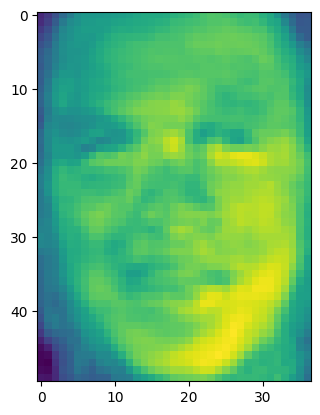

In [126]:
pca1=pca.components_[0].reshape(hight,width)
pca2=pca.components_[1].reshape(hight,width)
pca3=pca.components_[2].reshape(hight,width)
pca4=pca.components_[3].reshape(hight,width)
plt.imshow(pca1)


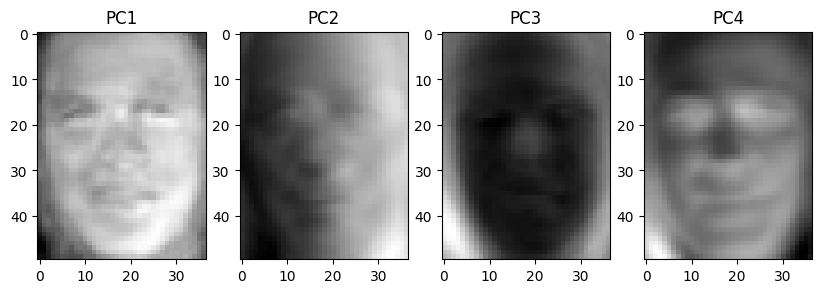

In [127]:
pca_all=[pca1,pca2,pca3,pca4]
plt.figure(figsize=(10,4))
for i,pca_i in enumerate(pca_all):
    plt.subplot(1,4,i+1)
    plt.imshow(pca_i,cmap='gray')
    plt.title(f"PC{i+1}")
plt.show()

 در pc1 مرزها پررنگ و نواحی داخلی روشن است. در pc2 سمت راست تصویر روشن و سمت چپ تاریک است. در pc3 مرزها نامشخص و روشن و نواحی داخلی تیره رنگ و تاریک است در این عکس بینی روشن تر و مشخص شده است.pc4 لبه های بالا و پایین سمت راست تاریک و سایر نواحی روشن تر است . در این عکس بینی تیره است و روس صورت مشخص شده است.

PC2 را انتخاب می کنم

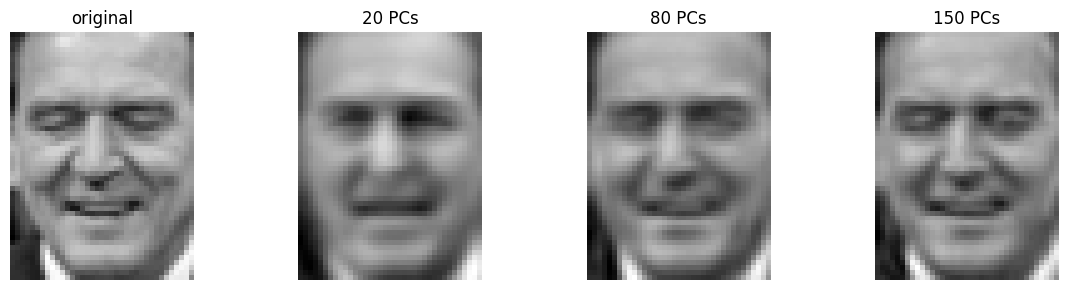

In [128]:
image_index=10
image_flat=data_mat[image_index].reshape(1,-1)
components_list=[20,80,150]
plt.figure(figsize=(12, 3))
plt.subplot(1, len(components_list)+1, 1)
plt.imshow(data_mat[image_index].reshape(hight,width), cmap='gray')
plt.title("original")
plt.axis('off')

for i , n_comp in enumerate(components_list):
    pca=PCA(n_components=n_comp)
    pca.fit(data_mat)
    image_trancform= pca.transform(image_flat)
    image_reconstructed = pca.inverse_transform(image_trancform)  
    image_reconstructed = image_reconstructed.reshape(hight, width)
    plt.subplot(1, len(components_list)+1, i+2)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title(f'{n_comp} PCs')
    plt.axis('off')

plt.tight_layout()
plt.show()

با اافزایش k تصویر به تصویر اصلی شبیه تر می شود.

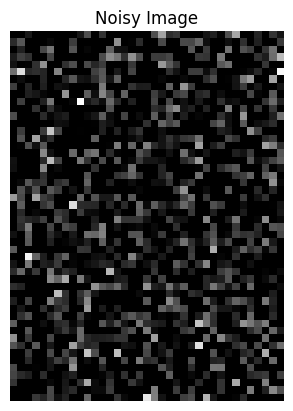

In [129]:
image_index = 10
image_flat = normal_pca[image_index].reshape(1, -1)

noise_std = 0.2
image_noisy = image_flat + np.random.normal(0, noise_std, image_flat.shape)
image_noisy = np.clip(image_noisy, 0, 1)  # مقادیر کم تر از 0 زا صفر و بیشتر از 1 را یک در نظر می گیرد
plt.imshow(image_noisy.reshape(hight, width), cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.show()



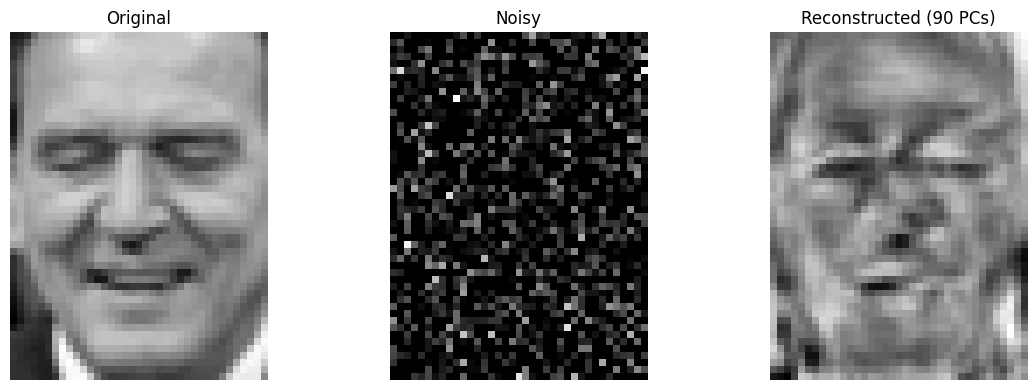

In [130]:
n_components = 90
pca = PCA(n_components=n_components)
pca.fit(data_mat)  # PCA روی داده‌های اصلی

# بازسازی تصویر نویزی
image_noisy_reconstructed = pca.inverse_transform(pca.transform(image_noisy))

# reshape برای نمایش
original_img = image_flat.reshape(hight, width)
noisy_img = image_noisy.reshape(hight, width)
reconstructed_img = image_noisy_reconstructed.reshape(hight, width)

# نمایش تصاویر
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_img, cmap='gray')
plt.title(f"Reconstructed ({n_components} PCs)")
plt.axis('off')

plt.tight_layout()
plt.show()

حفظ ساختار کلی:
مؤلفه‌های اصلی (با بیشترین واریانس) عمدتاً ساختارهای کلی و مهم تصویر را نگه می‌دارند، مانند شکل کلی چهره و موقعیت چشم‌ها، بینی و دهان.

حذف نویز:
نویز معمولاً جزئیات تصادفی با واریانس کم ایجاد می‌کند، بنابراین در مؤلفه‌های با واریانس پایین ظاهر می‌شود. وقتی فقط مؤلفه‌های اصلی را نگه می‌داریم، این نویز عملاً فیلتر می‌شود.

توازن تعداد مؤلفه‌ها:
هرچه مؤلفه‌های بیشتری استفاده کنیم، جزئیات بیشتری (و بخشی از نویز) بازسازی می‌شود. استفاده از تعداد کمتر مؤلفه‌ها باعث می‌شود نویز کمتر دیده شود ولی ممکن است جزئیات خیلی ریز هم از دست برود.

محدودیت‌های PCA در تشخیص چهره به‌صورت خلاصه:

1. **از دست رفتن جزئیات مهم با مؤلفه کم:**
   اگر تعداد مؤلفه‌ها خیلی کم انتخاب شود، ساختار کلی چهره حفظ می‌شود، اما جزئیات مهم مانند شکل دقیق چشم‌ها، بینی، لب‌ها یا چین‌وچروک‌ها از بین می‌رود. این باعث می‌شود در کاربردهای دقیق مثل تشخیص هویت یا تمایز چهره‌های شبیه، دقت کاهش یابد، حتی اگر تصویر بازسازی‌شده در نگاه اول «قابل قبول» به نظر برسد.

2. **حساسیت به نور و حالت چهره:**
   PCA فقط واریانس خطی را مدل می‌کند و نمی‌تواند تغییرات پیچیده نور، زاویه، یا حالت چهره را به خوبی مدیریت کند.

3. **نویز و داده غیرمعمول:**
   اگر داده‌ها دارای نویز شدید یا حالات غیرمعمول باشند، مؤلفه‌های اصلی ممکن است اطلاعات مفید را با نویز ترکیب کنند یا بخش مهمی از ویژگی‌ها را از دست بدهند.

4. **عدم انعطاف‌پذیری در تصاویر غیرخطی:**
   PCA خطی است؛ برای الگوهای پیچیده و غیرخطی در چهره‌ها (مثل حالات شدید صورت یا سایه‌ها) مناسب نیست و ممکن است ویژگی‌های کلیدی را از دست بدهد.

به طور خلاصه، **انتخاب تعداد مؤلفه‌ها یک توازن بین کاهش نویز و حفظ جزئیات مهم است**؛ کاهش بیش از حد مؤلفه‌ها ممکن است اطلاعات هویتی حیاتی را از بین ببرد، حتی اگر تصویر بازسازی شده هنوز «قابل مشاهده» به نظر برسد.

